In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1=pd.read_csv("train_agri.csv")

In [4]:
df1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
df1.shape

(4599, 10)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


Observation: Number_weeks_used has missing values

In [7]:
df1.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [8]:
df1.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

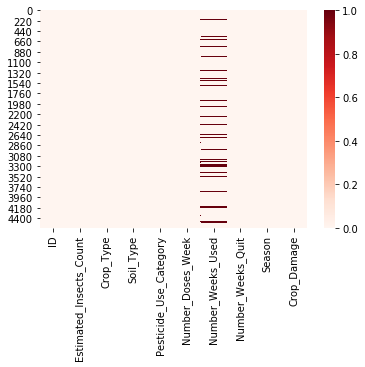

<Figure size 1440x1440 with 0 Axes>

In [9]:
sns.heatmap(df1.isnull(),cmap="Reds")
plt.figure(figsize=(20,20))
plt.show()

In [10]:
df1["Number_Weeks_Used"].replace(np.nan,df1["Number_Weeks_Used"].mean(),inplace=True)

In [11]:
df1.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [12]:
df1["Number_Weeks_Used"]=df1["Number_Weeks_Used"].round(decimals=0)

In [13]:
df1["Number_Weeks_Used"].unique()

array([ 0., 29., 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 22.,
       21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38., 42.,
       40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49., 53.,
       48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63., 66.,
       59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65.])

In [14]:
df1["Crop_Damage"].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

data is highly unbalanced

In [15]:
df1.groupby(["Season","Crop_Damage"])["Crop_Damage"].count()

Season  Crop_Damage
1       0              1150
        1               192
        2                37
2       0              1908
        1               358
        2                61
3       0               762
        1               114
        2                17
Name: Crop_Damage, dtype: int64

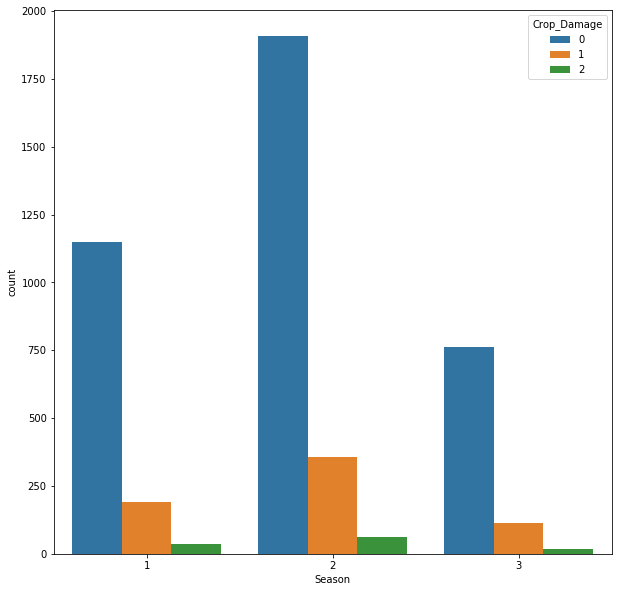

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x="Season", hue="Crop_Damage", data=df1)
plt.show()

In [17]:
df1.groupby(["Crop_Type","Crop_Damage"])["Crop_Damage"].count()


Crop_Type  Crop_Damage
0          0              2979
           1               498
           2                88
1          0               841
           1               166
           2                27
Name: Crop_Damage, dtype: int64

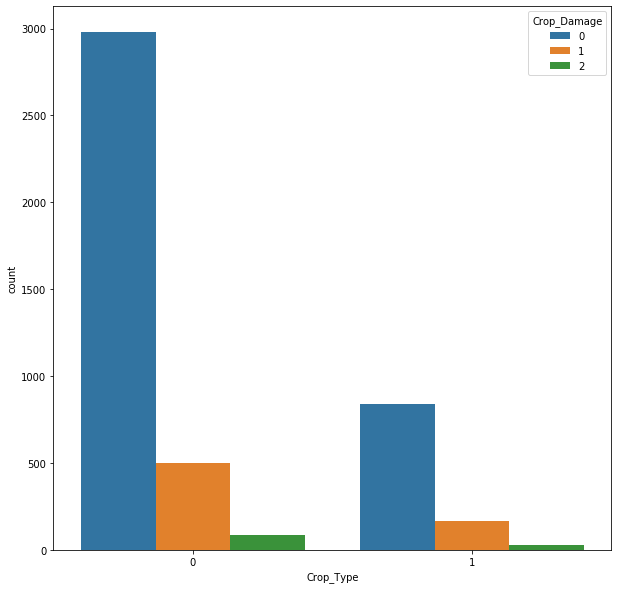

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x="Crop_Type", hue="Crop_Damage", data=df1)
plt.show()

In [19]:
df1.groupby(["Soil_Type","Crop_Damage"])["Crop_Damage"].count()

Soil_Type  Crop_Damage
0          0              1947
           1               390
           2                70
1          0              1873
           1               274
           2                45
Name: Crop_Damage, dtype: int64

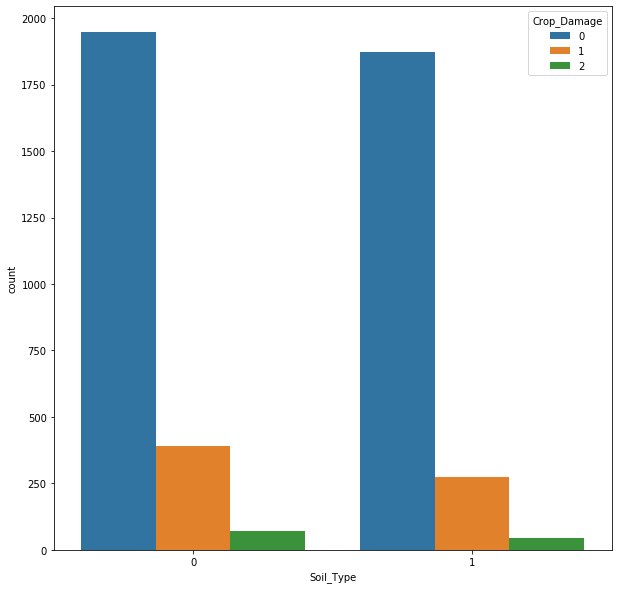

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x="Soil_Type", hue="Crop_Damage", data=df1)
plt.show()

In [21]:
df1.groupby(["Pesticide_Use_Category","Crop_Damage"])["Crop_Damage"].count()

Pesticide_Use_Category  Crop_Damage
1                       0                 7
                        1                33
                        2                 5
2                       0              2881
                        1               290
                        2                34
3                       0               932
                        1               341
                        2                76
Name: Crop_Damage, dtype: int64

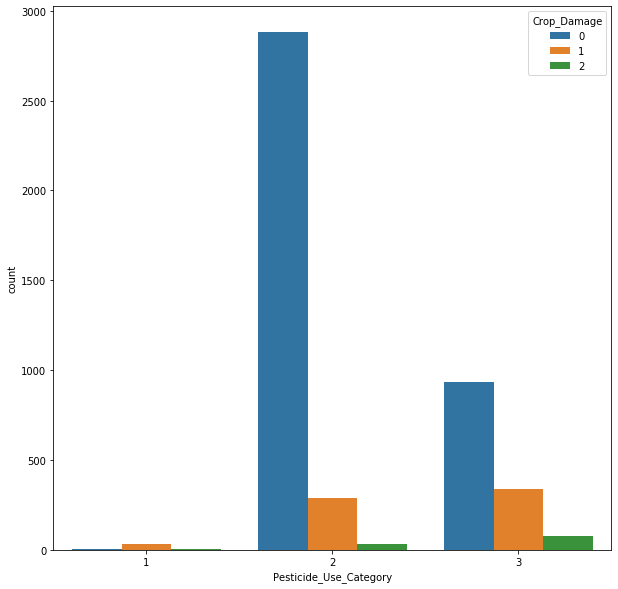

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x="Pesticide_Use_Category", hue="Crop_Damage", data=df1)
plt.show()

Above was the visulaization of categorical data now checking numerical data distribution

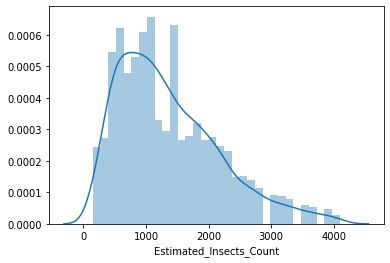

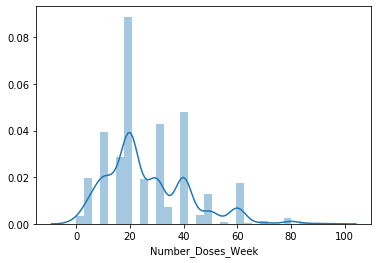

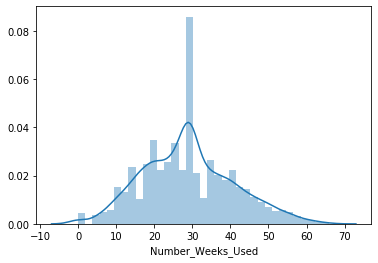

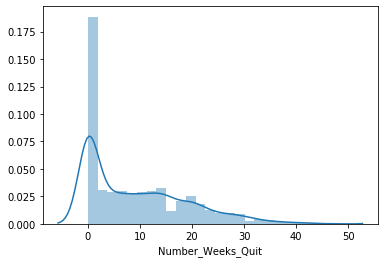

In [23]:
for i in ("Estimated_Insects_Count","Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit"):
    sns.distplot(df1[i])
    plt.show()

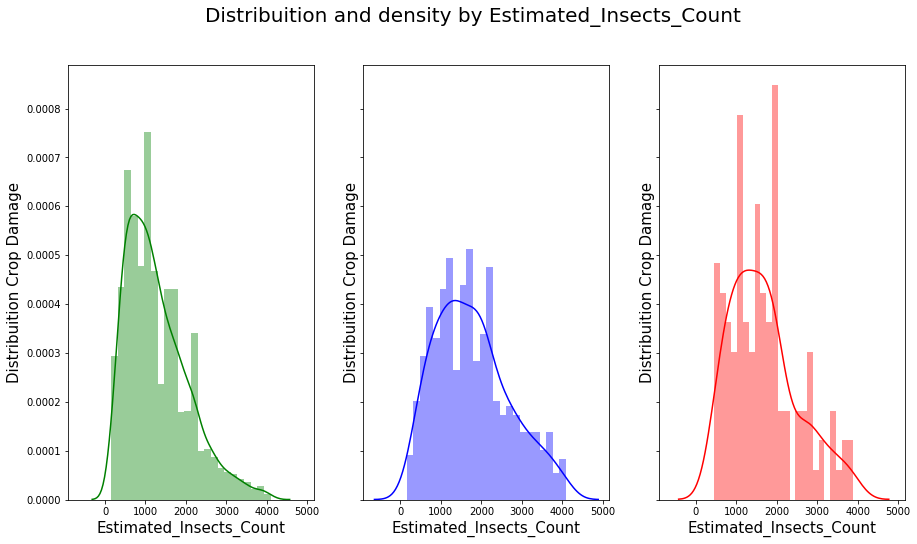

In [24]:
inscect_high_Damage_low = df1[(df1["Estimated_Insects_Count"] > 0) & 
                              (df1["Crop_Damage"] == 0)]
inscect_high_Damage_medium = df1[(df1["Estimated_Insects_Count"] > 0) & 
                              (df1["Crop_Damage"] == 1)]                                   
inscect_high_Damage_high= df1[(df1["Estimated_Insects_Count"] > 0) & 
                              (df1["Crop_Damage"] == 2)]
fig,ax=plt.subplots(1,3,figsize=(15,8),sharex=True,sharey=True)
# Ploting the 2 variables that we create and compare the three
sns.distplot(inscect_high_Damage_low["Estimated_Insects_Count"], bins=24, color='g',ax=ax[0])
sns.distplot(inscect_high_Damage_medium["Estimated_Insects_Count"], bins=24, color='b',ax=ax[1])
sns.distplot(inscect_high_Damage_high["Estimated_Insects_Count"], bins=24, color='r',ax=ax[2])
fig.suptitle("Distribuition and density by Estimated_Insects_Count",fontsize=20)
for ax in ax:
    ax.set_xlabel("Estimated_Insects_Count",fontsize=15)
    ax.set_ylabel("Distribuition Crop Damage",fontsize=15)
plt.show()

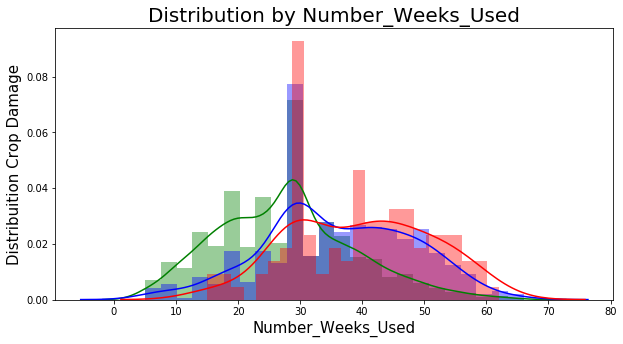

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


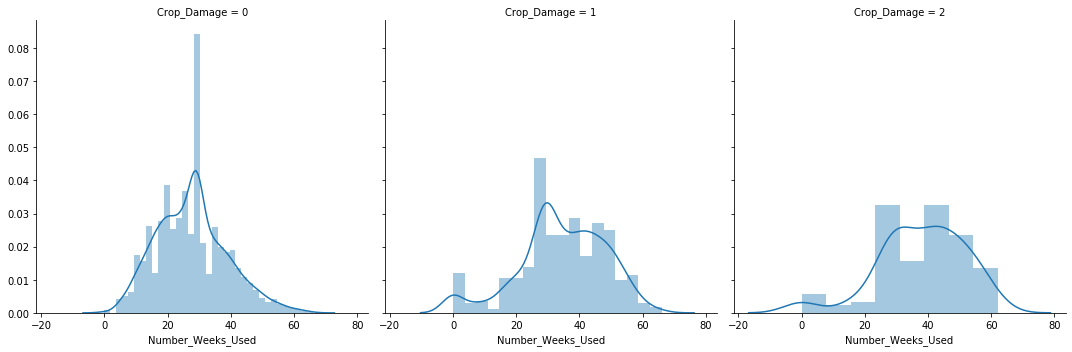

In [25]:
inscect_high_Damage_low = df1[(df1["Number_Weeks_Used"] > 0) & 
                              (df1["Crop_Damage"] == 0)]

inscect_high_Damage_medium = df1[(df1["Number_Weeks_Used"] > 0) & 
                              (df1["Crop_Damage"] == 1)]                                   
inscect_high_Damage_high= df1[(df1["Number_Weeks_Used"] > 0) & 
                              (df1["Crop_Damage"] == 2)]
#figure size
plt.figure(figsize=(10,5))
# Ploting the 2 variables that we create and compare the three
sns.distplot(inscect_high_Damage_low["Number_Weeks_Used"], bins=24, color='g')
sns.distplot(inscect_high_Damage_medium["Number_Weeks_Used"], bins=24, color='b')
sns.distplot(inscect_high_Damage_high["Number_Weeks_Used"], bins=24, color='r')
plt.title("Distribution by Number_Weeks_Used",fontsize=20)
plt.xlabel("Number_Weeks_Used",fontsize=15)
plt.ylabel("Distribuition Crop Damage",fontsize=15)
plt.show()
g = sns.FacetGrid(df1, col='Crop_Damage',size=5)
g = g.map(sns.distplot, "Number_Weeks_Used")
plt.show()

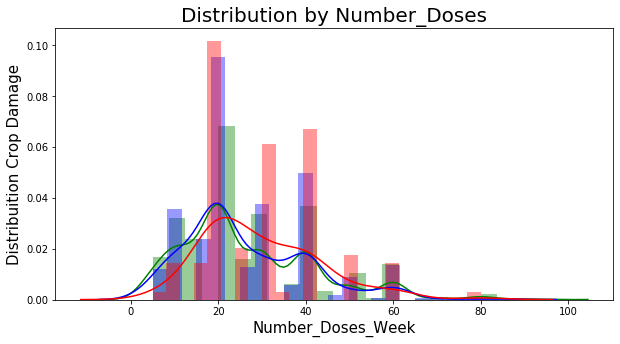

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


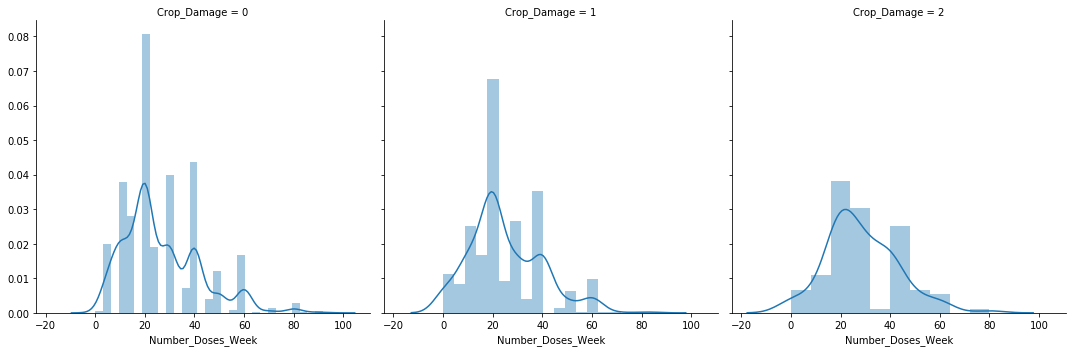

In [26]:
inscect_high_Damage_low = df1[(df1["Number_Doses_Week"] > 0) & 
                              (df1["Crop_Damage"] == 0)]
inscect_high_Damage_medium = df1[(df1["Number_Doses_Week"] > 0) & 
                              (df1["Crop_Damage"] == 1)]                                   
inscect_high_Damage_high= df1[(df1["Number_Doses_Week"] > 0) & 
                              (df1["Crop_Damage"] == 2)]
#figure size
plt.figure(figsize=(10,5))
# Ploting the 2 variables that we create and compare the three
sns.distplot(inscect_high_Damage_low["Number_Doses_Week"], bins=24, color='g')
sns.distplot(inscect_high_Damage_medium["Number_Doses_Week"], bins=24, color='b')
sns.distplot(inscect_high_Damage_high["Number_Doses_Week"], bins=24, color='r')                        
plt.title("Distribution by Number_Doses",fontsize=20)
plt.xlabel("Number_Doses_Week",fontsize=15)
plt.ylabel("Distribuition Crop Damage",fontsize=15)
plt.show()
# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(df1, col='Crop_Damage',size=5)
g = g.map(sns.distplot, "Number_Doses_Week")
plt.show()

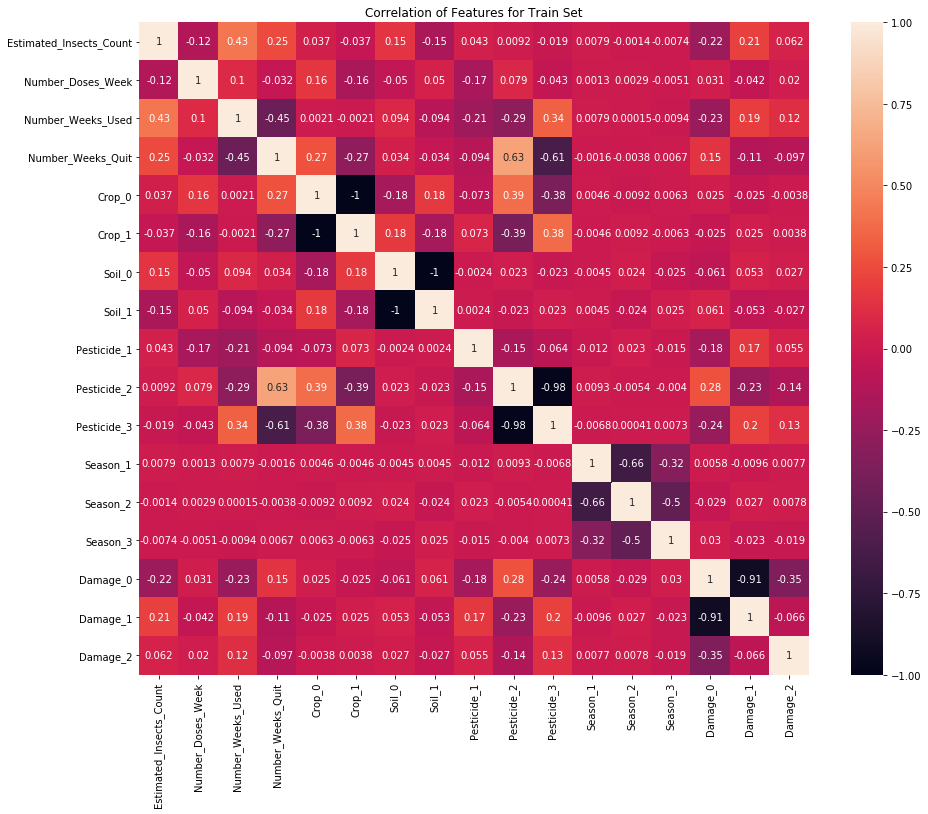

In [27]:
df_new = pd.get_dummies(df1, columns=["Crop_Type","Soil_Type","Pesticide_Use_Category","Season","Crop_Damage"],\
                         prefix=["Crop","Soil","Pesticide","Season","Damage"], drop_first=False)
df_new.drop(columns="ID",axis=1,inplace=True)
plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_new.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

Initial Observation

1)Crop type 0 has higher chance of survival compared to crop type 1 

2) In Season 2 highest crop failure happens

3)Pesticide category 0 has no impact on Crop survival. Means if there is less data to determine that no pesticide has any impact on crop survival. Pesticide category 2 (Previously used Pesticides) is the best for Crops compared to the newly ones; If the pesticide doses are between 10 to 40 the crops have high survival rate; Crop has better chance to survive in Season 2 compared to other seasons

4)Its evident that If the usage of pesticide is used between 10 to 30 there is higher chance for Crop to survive. If the number of weeks of pesticide usage is more than 30 then crop damage definitely more than moderate or high.

5)So from the above graphs its clear that we have to normalize the factors using log or normal distribution and apply dummy values to categorical data set.

6)Soil type 0 has higher survial rate for Crop compared to soil type 1;

7)pesticide category 0 has no impact on Crop survival. Means if there is less data to determine that no pesticide has any impact on crop survival.

8)Pesticide category 2 (Previously used Pesticides) is the best for Crops compared to the newly ones;
If the pesticide doses are between 10 to 40 the crops have high survival rate;
Crop has better chance to survive in Season 2 compared to other seasons*



# feature Engineering:
Lets normalize the numeric variables Lets implement Dummy Encoding of the Categorical Values and change then to int16

In [28]:
df1['Estimated_Insects_Count']=np.log(df1['Estimated_Insects_Count'])

In [29]:
df1.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,7.022419,0.224831,0.476625,2.283540,26.477495,28.901500,9.205479,1.894325,0.194390
std,0.661525,0.417517,0.499508,0.471978,15.524647,11.965828,9.713253,0.694952,0.454597
min,5.010635,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.594413,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,7.100027,0.000000,0.000000,2.000000,20.000000,29.000000,7.000000,2.000000,0.000000
75%,7.487734,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,8.318010,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [30]:
#Implementing  Encoding for some of the numeric columns
df1['Number_Doses_Week_bin'] = np.where(df1['Number_Doses_Week']>20,1,0)
df1['Number_Weeks_Used_bin'] = np.where(df1['Number_Weeks_Used']>36,1,0)
df1['Number_Weeks_Quit_bin'] = np.where(df1['Number_Weeks_Quit']>7,1,0)

In [31]:
#Implementing  Dummy Encoding for categorical columns
df1 = pd.get_dummies(df1, columns=["Crop_Type","Soil_Type","Pesticide_Use_Category","Season"],\
                         prefix=["Crop","Soil","Pesticide","Season"], drop_first=False)

In [32]:
df1

,ID,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Number_Doses_Week_bin,Number_Weeks_Used_bin,Number_Weeks_Quit_bin,Crop_0,Crop_1,Soil_0,Soil_1,Pesticide_1,Pesticide_2,Pesticide_3,Season_1,Season_2,Season_3
0,F00000001,5.236442,0,0.0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0
1,F00000003,5.342334,0,0.0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0
2,F00000004,5.549076,0,0.0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0
3,F00000005,5.549076,0,0.0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0
4,F00000006,5.834811,0,0.0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,7.667626,20,29.0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0
4595,F00008079,7.668094,30,47.0,2,1,1,1,0,1,0,0,1,0,1,0,1,0,0
4596,F00008080,7.726213,10,7.0,27,0,0,0,1,1,0,0,1,0,1,0,0,1,0
4597,F00008082,7.726213,10,20.0,24,0,0,0,1,1,0,0,1,0,1,0,0,1,0


In [34]:
col=['Crop_0','Crop_1','Soil_0','Soil_1','Pesticide_1','Pesticide_2','Pesticide_3','Season_1','Season_2','Season_3']
for i in col:
    df1[i] = df1[i].astype('category')
    df1[i] = df1[i].cat.codes.astype("int16")

In [35]:
df1=df1.drop(['Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit'],axis=1)
df1=df1.drop(['ID'],axis=1)

In [36]:
df1

,Estimated_Insects_Count,Crop_Damage,Number_Doses_Week_bin,Number_Weeks_Used_bin,Number_Weeks_Quit_bin,Crop_0,Crop_1,Soil_0,Soil_1,Pesticide_1,Pesticide_2,Pesticide_3,Season_1,Season_2,Season_3
0,5.236442,0,0,0,0,0,1,1,0,1,0,0,1,0,0
1,5.342334,1,0,0,0,0,1,1,0,1,0,0,0,1,0
2,5.549076,1,0,0,0,0,1,1,0,1,0,0,0,1,0
3,5.549076,1,0,0,0,0,1,0,1,1,0,0,0,1,0
4,5.834811,1,0,0,0,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,7.667626,1,0,0,0,1,0,0,1,0,1,0,1,0,0
4595,7.668094,1,1,1,0,1,0,0,1,0,1,0,1,0,0
4596,7.726213,0,0,0,1,1,0,0,1,0,1,0,0,1,0
4597,7.726213,0,0,0,1,1,0,0,1,0,1,0,0,1,0


# Implementing Model

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [45]:
x= df1.drop(['Crop_Damage'],axis=1)
y= df1[['Crop_Damage']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 22)

In [46]:
print(x.shape)
print(y.shape)


(4599, 14)
(4599, 1)


In [47]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x= scaler.fit_transform(x)

In [48]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0
for i in range(101):
    rf = RandomForestClassifier(random_state=i)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(y_test,y_pred_rf)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy

        
print(max_accuracy)


80.87


In [49]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       979
           1       0.28      0.24      0.26       144
           2       0.06      0.04      0.04        27

    accuracy                           0.81      1150
   macro avg       0.41      0.40      0.40      1150
weighted avg       0.79      0.81      0.80      1150



In [50]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77101449 0.8        0.7826087  0.7826087  0.7884058  0.76521739
 0.76231884 0.80869565 0.77391304 0.76453488]
Mean: 0.7799317492416582
Standard Deviation: 0.014818134170468266


In [52]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rfc_cv, x, y, cv=3)
confusion_matrix(df1['Crop_Damage'], predictions)

array([[3379,  384,   57],
       [ 512,  126,   26],
       [  83,   26,    6]], dtype=int64)

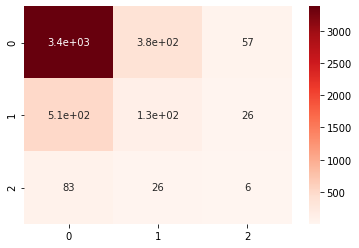

<Figure size 1440x720 with 0 Axes>

In [54]:
sns.heatmap(confusion_matrix(df1['Crop_Damage'], predictions),cmap="Reds",annot=True)
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.show()

In [55]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_KNN = KNN.predict(x_test)
accuracy = round(accuracy_score(y_test,y_pred_KNN)*100,2)
        
print("Accuracy:",accuracy)
print()
print("Classification Report:")
print(classification_report(y_test,y_pred_KNN))

Accuracy: 83.57

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       979
           1       0.33      0.18      0.23       144
           2       0.00      0.00      0.00        27

    accuracy                           0.84      1150
   macro avg       0.40      0.38      0.38      1150
weighted avg       0.78      0.84      0.81      1150



In [56]:
confusion_matrix(y_test,y_pred_KNN)

array([[935,  44,   0],
       [118,  26,   0],
       [ 18,   9,   0]], dtype=int64)

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8576086956521739


In [83]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[769  15   0]
 [ 97  20   0]
 [ 15   4   0]]


In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       784
           1       0.51      0.17      0.26       117
           2       0.00      0.00      0.00        19

    accuracy                           0.86       920
   macro avg       0.46      0.38      0.39       920
weighted avg       0.81      0.86      0.82       920



So as we can see random forest is performing better so selecting the logistic regression model

In [91]:
from sklearn.externals import joblib
joblib.dump(model,"SDSS.pkl")

['SDSS.pkl']